In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import pandas as pd
import numpy as np 

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import flair 


import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/processed/tanishq_data_clean_labelled.csv')

In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
df

,Tweet,sentiment,clean_tweet,clean_tweet_token,clean_tweet_segmented
0,I hv been disappointed by the fact that Tanish...,4.0,i hv been disappointed by the fact that tanish...,i hv been disappointed by the fact that tanish...,i hv been disappointed by the fact that tanish...
1,@TanishqJewelry @RNTata2000 #EkatvamByTanishq...,4.0,ekatvambytanishq thank you so much for beautif...,ekatvambytanishq thank you so much for beautif...,ek at vam by tanishq thank you so much for bea...
2,#EkatvamByTanishq @tanishq #HappyDiwali @sayan...,4.0,ekatvambytanishq happydiwali a wonderful ad an...,ekatvambytanishq happydiwali a wonderful ad an...,ek at vam by tanishq happy diwali a wonderful ...
3,Hope @TanishqJewelry wishes d same on #NewYear...,0.0,hope wishes d same on newyearseve have u ever ...,hope wishes d same on newyearseve have u ever ...,hope wishes d same on new years eve have u eve...
4,@Ramesh_hjs @RituRathaur @HinduJagrutiOrg @rah...,10.0,this is called tanishqekatvam by ms r united n...,this is called tanishqekatvam by ms r united n...,this is called tan ishq ek atv am by ms r unit...
...,...,...,...,...,...
9422,@TanishqJewelry @AlayaF___ @NimratOfficial @Ne...,NaN,boycotttanishq,boycotttanishq,boycott tanishq
9423,Why every time same mistake #boycotttanishq,NaN,why every time same mistake boycotttanishq,why every time same mistake boycotttanishq,why every time same mistake boycott tanishq
9424,#boycotttanishq stop giving gyaan to us... Sto...,NaN,boycotttanishq stop giving gyaan to us stop ki...,boycotttanishq stop giving gyaan to us stop ki...,boycott tanishq stop giving gyaan to us stop k...
9425,"So Diwali is only buying gold, ""nice"" clothes,...",NaN,so diwali is only buying gold nice clothes par...,so diwali is only buying gold nice clothes par...,so diwali is only buying gold nice clothes par...


In [4]:
df['textblob_polarity'] = df['clean_tweet_segmented'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['textblob_sentiment'] = df['textblob_polarity'].apply(lambda x: "positive" if x > 0.05 else "negative" if x < 0.05 else "neutral")

In [5]:
analyzer = SentimentIntensityAnalyzer()
df['vader_polarity'] = df['clean_tweet_segmented'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_polarity'].apply(lambda x: "positive" if x > 0.05 else "negative" if x < 0.05 else "neutral")

In [6]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2021-02-20 22:31:18,823 loading file /Users/mamu867/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [7]:
def get_flair_pol(text):
    s = flair.data.Sentence(text)
    flair_sentiment.predict(s)
    return s.get_label_names()[0].lower()

In [8]:
df['flair_sentiment'] = df['clean_tweet_segmented'].apply(lambda x: get_flair_pol(x))


In [9]:
df = df[['sentiment', 'textblob_sentiment', 'vader_sentiment', 'flair_sentiment']]
df

,sentiment,textblob_sentiment,vader_sentiment,flair_sentiment
0,4.0,negative,positive,negative
1,4.0,positive,positive,positive
2,4.0,positive,positive,positive
3,0.0,positive,positive,negative
4,10.0,negative,positive,negative
...,...,...,...,...
9422,NaN,negative,negative,negative
9423,NaN,negative,negative,negative
9424,NaN,negative,negative,negative
9425,NaN,positive,positive,negative


In [10]:
df['sentiment'] = df['sentiment'].apply(lambda x: "positive" if x == 4.0 else "negative" if x == 0.0 else "neutral" if x == 2.0 else np.nan)

In [11]:
df.dropna(inplace=True)

In [12]:
df

,sentiment,textblob_sentiment,vader_sentiment,flair_sentiment
0,positive,negative,positive,negative
1,positive,positive,positive,positive
2,positive,positive,positive,positive
3,negative,positive,positive,negative
5,negative,negative,positive,negative
...,...,...,...,...
2150,negative,negative,negative,negative
2162,negative,negative,negative,negative
2172,positive,positive,negative,negative
2192,negative,negative,negative,negative


In [13]:
df = df.applymap(lambda x: 1 if x == "positive" else 0)

In [14]:
df

,sentiment,textblob_sentiment,vader_sentiment,flair_sentiment
0,1,0,1,0
1,1,1,1,1
2,1,1,1,1
3,0,1,1,0
5,0,0,1,0
...,...,...,...,...
2150,0,0,0,0
2162,0,0,0,0
2172,1,1,0,0
2192,0,0,0,0


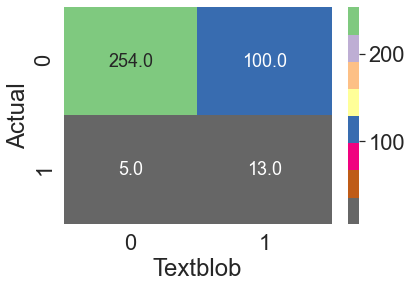

In [23]:
sns.set_style("darkgrid")
confusion_matrix_textblob = pd.crosstab(df['sentiment'], df['textblob_sentiment'], rownames=['Actual'], colnames=['Textblob'])
#confusion_matrix_textblob.style.background_gradient()
sns.set(font_scale=2) # for label size
sns.heatmap(confusion_matrix_textblob, 
            annot=True, 
            annot_kws={"size": 18}, 
            #cmap="mako",
            fmt=".1f",
            cmap='Accent_r') # font size
plt.savefig('../images/textblob_conf_mat.png')
plt.show()



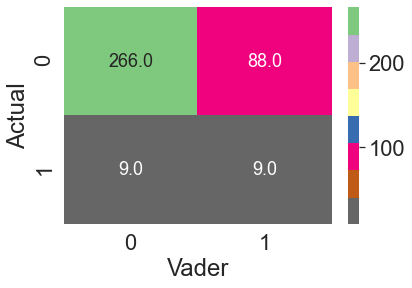

In [22]:
sns.set_style("darkgrid")
confusion_matrix_vader = pd.crosstab(df['sentiment'], df['vader_sentiment'], rownames=['Actual'], colnames=['Vader'])
#confusion_matrix_vader.style.background_gradient()
sns.set(font_scale=2) # for label size
sns.heatmap(confusion_matrix_vader, 
            annot=True, 
            annot_kws={"size": 18}, 
            cmap="Accent_r",
            fmt=".1f",) # font size
plt.savefig('../images/vader_conf_mat.png')
plt.show()


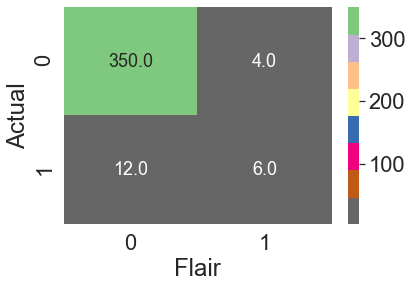

In [21]:
sns.set_style("darkgrid")
confusion_matrix_flair = pd.crosstab(df['sentiment'], df['flair_sentiment'], rownames=['Actual'], colnames=['Flair'])
#confusion_matrix_textblob.style.background_gradient()
sns.set(font_scale=2) # for label size
sns.heatmap(confusion_matrix_flair, 
            annot=True, 
            annot_kws={"size": 18}, 
            cmap="Accent_r",
            fmt=".1f",) # font size
plt.savefig('../images/flair_conf_mat.png')
plt.show()


## Advantage of pretrained models: 

1. very fast and easy to implement 
2. Uses BoW with a simple heuristics. Sentiment intensity increases with words like "really", "very", "so", etc. 
3. Instead of taking average of sentiments of the words, it considers group of words, such as negated positive words like "not happy", to account for complex lexicology.

## Disadvantage: 

1. Out of Vocab (OOV) will just not be taken into consideration for classification.
2. May not be well suited for particular sentiment classification task that uses a corpus that is not commonly found in other sentiment classification task.  

### TODO ## Make a comparative analysis of the three libraries used here and what are the advantages and disadvantages of each of these libraries.
